In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import dysts
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings/")
sys.path.append("/Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings")
from src.models import RNN

In [2]:
from dysts.flows import Lorenz, Hadley
import torch.nn as nn
from utils import make_dataset,train
from torch.optim import AdamW

model = RNN(1,1,'GRU',d_model=10)
train_loader, val_loader, train_data, val_data = make_dataset(Lorenz,2000,10)
#model,train_set,val_set,epochs,lr,optimizer,loss_fn,device

all_train_loss = []
all_val_loss = []
for num_steps in [1,3]:
    model, train_loss, val_loss = train(model, train_loader, val_loader, 50, 1e-2,AdamW, nn.MSELoss(), 'cuda',num_steps)
    model, train_loss, val_loss = train(model, train_loader, val_loader, 50, 1e-3,AdamW, nn.MSELoss(), 'cuda',num_steps)
    all_train_loss.extend(train_loss)
    all_val_loss.extend(val_loss)

plt.plot(all_train_loss)
plt.plot(all_val_loss)

(10, 2000, 3) torch.Size([10, 2000, 1])
(10, 2000, 3) torch.Size([10, 2000, 1])


AssertionError: Torch not compiled with CUDA enabled

/tmp/ipykernel_20878/3587103818.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).float().cuda()


torch.Size([1, 1000, 1])
torch.Size([1, 1000, 1]) (1000, 3)


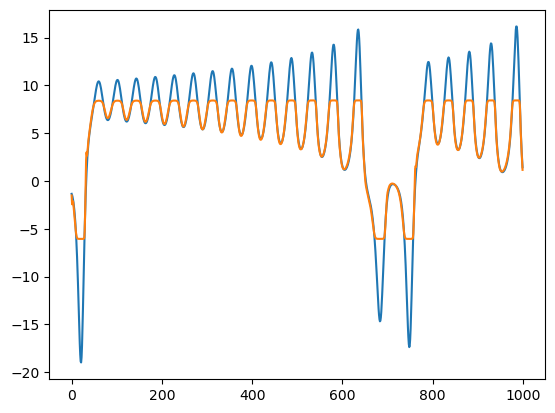

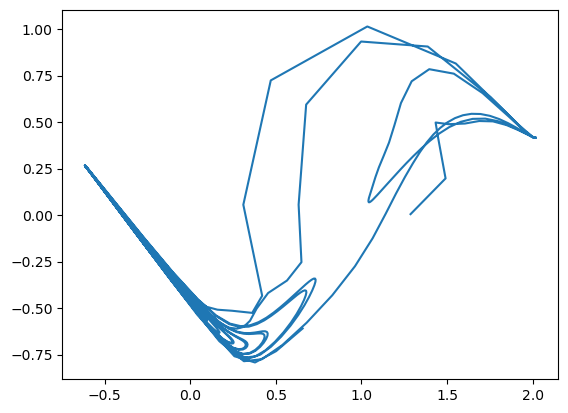

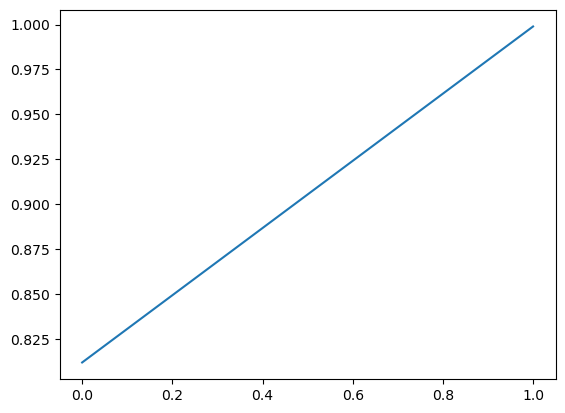

In [3]:
from sklearn.decomposition import PCA
import torch

data = next(iter(train_loader))

data = torch.tensor(data).float().cuda()
print(data.size())
plt.figure()
plt.plot(data[0,:,0].cpu())


out,hiddens = model(data)
hidden = hiddens.detach().cpu().numpy().squeeze()
print(out.shape, hidden.shape)
plt.plot(out.detach().cpu().numpy()[0,:,0])

#run pca on the hidden states
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(hidden)
hidden_pca = pca.transform(hidden)
plt.figure()
plt.plot(hidden_pca[:,0],hidden_pca[:,1],label="reconstructed w PCA")
# plt.plot(sol[:,0],sol[:,1],label="original")
plt.figure()
#plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))
